In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import load_img,img_to_array

In [9]:
pic_size = 48
b_path = "../input/face-expression-recognition-dataset/images/"

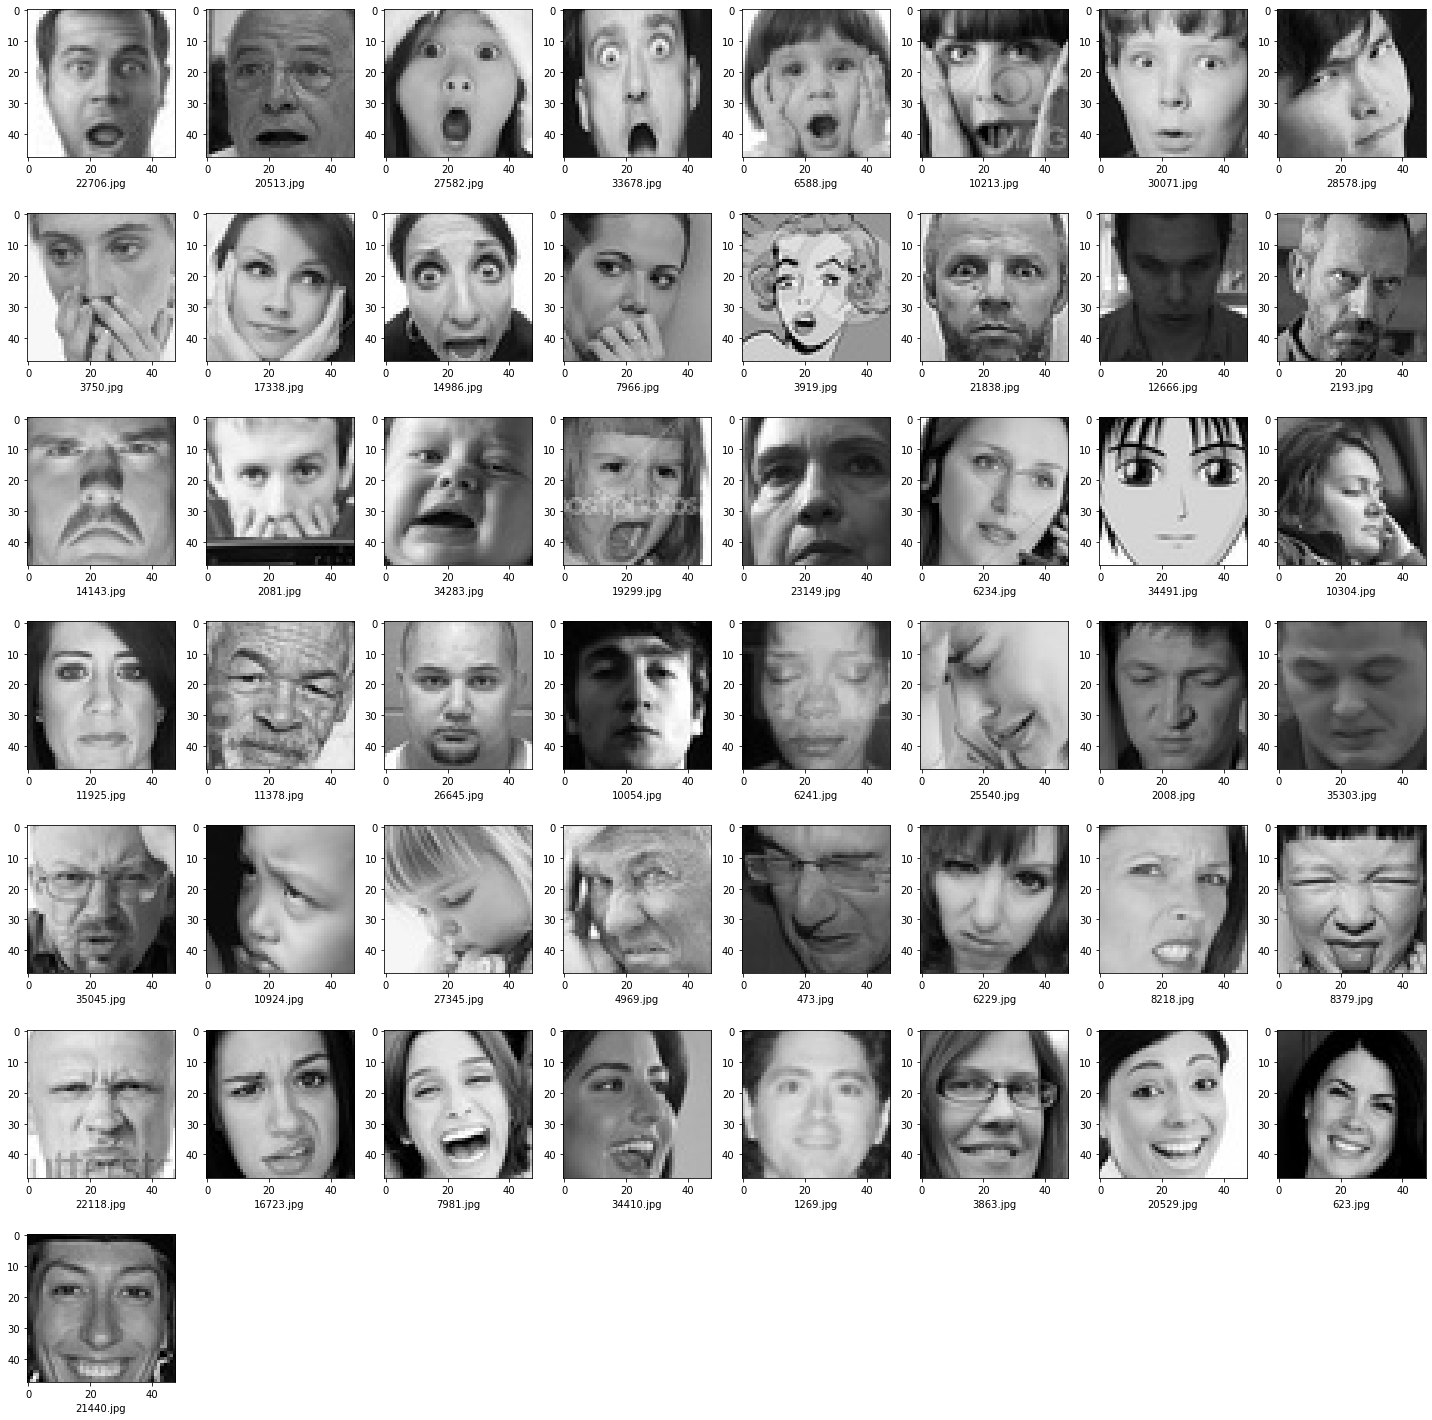

In [10]:
plt.figure(0,figsize=(20,20))
cpt=0
for expression in os.listdir(b_path + "train/"):
    for i in range(1,8):
        cpt += 1
        plt.subplot(7,8,cpt)
        img=load_img(b_path+"train/"+expression+"/"+os.listdir(b_path+"train/"+expression)[i],target_size=(pic_size,pic_size))
        plt.imshow(img,cmap='gray')
        plt.xlabel(os.listdir(b_path+"train/"+expression)[i])
plt.tight_layout()
plt.show()

In [11]:
for expression in os.listdir(b_path + "train"):
    print(str(len(os.listdir(b_path + "train/" + expression)))+" "+expression+" images")

3205 surprise images
4103 fear images
3993 angry images
4982 neutral images
4938 sad images
436 disgust images
7164 happy images


In [12]:
from keras.preprocessing.image import ImageDataGenerator as IDG

In [13]:
train_dat = IDG()
val_dat = IDG()
batch_size = 128
train_gen = train_dat.flow_from_directory(b_path+"train",target_size=(pic_size,pic_size)
                                          ,color_mode="grayscale",batch_size=batch_size,
                                          class_mode="categorical",shuffle=True)
val_gen = val_dat.flow_from_directory(b_path+"validation",target_size=(pic_size,pic_size),
                                       color_mode="grayscale",batch_size=batch_size,
                                       class_mode="categorical",shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [14]:
from keras.optimizers import Adam,SGD,RMSprop
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import PIL


In [16]:
def create_AlexNet():
    model = Sequential()

    # First Convolutionary Layer
    model.add(Conv2D(filters=96, input_shape=(48, 48, 1), kernel_size=(11, 11), strides=(4, 4), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())

    # Second Convolutionary Layer
    model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())

    # Third Convolutionary Layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # Fourth Convolutionary Layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # Fifth Convolutionary Layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(1000))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(7, activation='softmax'))

    return model

# create the model
model = create_AlexNet()

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
epochs = 20
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_weights.h5",monitor = "val_acc",verbose=1,
                             save_best_only=True,mode = "max")
callbacks_list = [checkpoint]
history = model.fit_generator(generator=train_gen,steps_per_epoch=train_gen.n//train_gen.batch_size
                              ,epochs=epochs,validation_data = val_gen,validation_steps=val_gen.n//val_gen.batch_size,
                             callbacks = callbacks_list)

Epoch 1/20
225/225 [==============================] - 312s 1s/step - loss: 2.1427 - accuracy: 0.2226 - val_loss: 1.8863 - val_accuracy: 0.2750
Epoch 2/20
225/225 [==============================] - 290s 1s/step - loss: 1.7622 - accuracy: 0.3295 - val_loss: 1.7395 - val_accuracy: 0.3152
Epoch 3/20
225/225 [==============================] - 291s 1s/step - loss: 1.6044 - accuracy: 0.3848 - val_loss: 1.6006 - val_accuracy: 0.3477
Epoch 4/20
225/225 [==============================] - 290s 1s/step - loss: 1.4918 - accuracy: 0.4238 - val_loss: 1.8778 - val_accuracy: 0.2818
Epoch 5/20
225/225 [==============================] - 289s 1s/step - loss: 1.3965 - accuracy: 0.4686 - val_loss: 1.5291 - val_accuracy: 0.4156
Epoch 6/20
225/225 [==============================] - 291s 1s/step - loss: 1.3264 - accuracy: 0.4984 - val_loss: 1.6659 - val_accuracy: 0.3841
Epoch 7/20
225/225 [==============================] - 291s 1s/step - loss: 1.2389 - accuracy: 0.5372 - val_loss: 1.6161 - val_accuracy: 0.4161

NameError: name 'history' is not defined

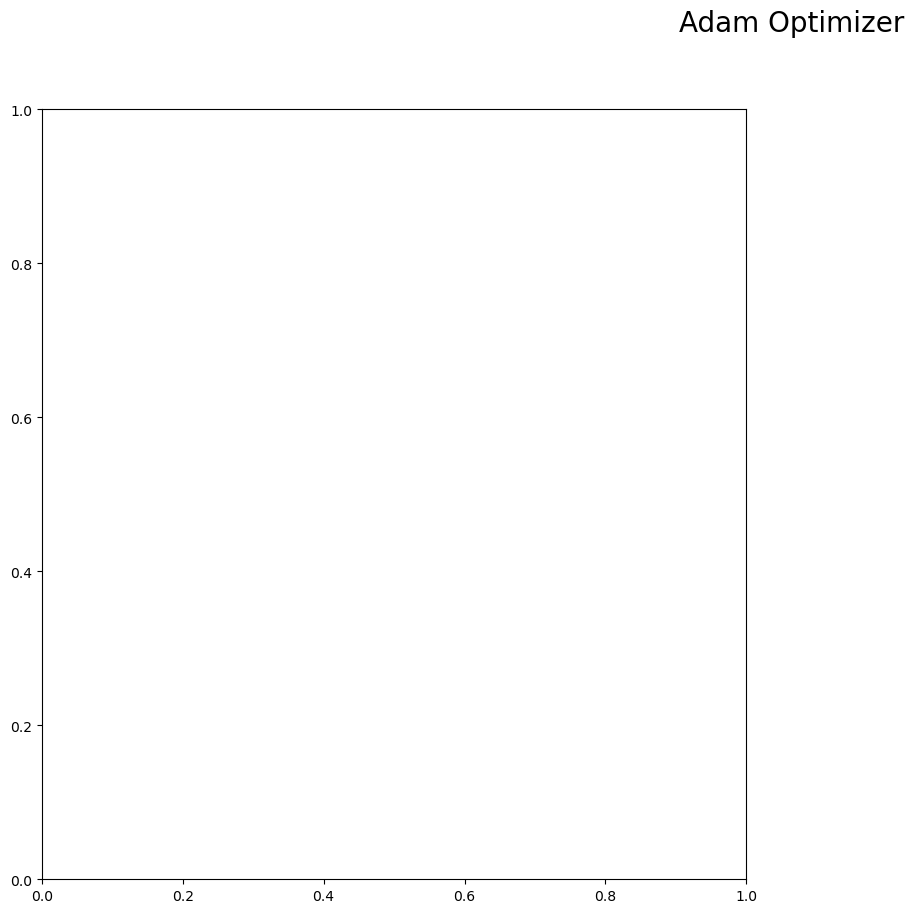

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Adam Optimizer',fontsize=20)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel("Accuracy",fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()